In [1]:

# Load in some packages
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# load dataset
electron_sales_df =pd.read_excel(r"C:\Users\jki\Downloads\electronic sales\electronic sales.xlsx")  
electron_sales_df 


,Order ID,Product,Quantity,Price,Date,Address
0,176558.0,USB-C Charging Cable,2.0,12.0,2019-04-19,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,12.0,2019-04-30,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
65530,219872.0,Wired Headphones,1.0,12.0,2019-06-27,"846 9th St, Seattle, WA 98101"
65531,219873.0,AAA Batteries (4-pack),1.0,3.0,2019-06-18,"838 12th St, Los Angeles, CA 90001"
65532,219874.0,USB-C Charging Cable,1.0,12.0,2019-06-13,"925 Chestnut St, Atlanta, GA 30301"
65533,219875.0,Wired Headphones,1.0,12.0,2019-06-13,"692 9th St, Boston, MA 02215"


In [2]:
# let see if we have missing values
missing_values = electron_sales_df.isna().sum()
print(missing_values)

Order ID    323
Product     323
Quantity    323
Price       323
Date        323
Address     323
dtype: int64


In [14]:
# lets remove missing values
electron_sales_df.dropna(subset=['Order ID'],inplace=True)
electron_sales_df.dropna(subset=['Product'],inplace=True)
electron_sales_df.dropna(subset=['Quantity'],inplace=True)
electron_sales_df.dropna(subset=['Price'],inplace=True)
electron_sales_df.dropna(subset=['Date'],inplace=True)
electron_sales_df.dropna(subset=['Address'],inplace=True)

# let see if we have missing values
missing_values = electron_sales_df.isna().sum()
print(missing_values)

Order ID    0
Product     0
Quantity    0
Price       0
Date        0
Address     0
dtype: int64


In [4]:
# lets change the date format
electron_sales_df['Date'] = pd.to_datetime(electron_sales_df['Date'])
electron_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Order ID  65212 non-null  float64       
 1   Product   65212 non-null  object        
 2   Quantity  65212 non-null  float64       
 3   Price     65212 non-null  float64       
 4   Date      65212 non-null  datetime64[ns]
 5   Address   65212 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.0+ MB


In [6]:
# Numerical features 'Quantity Ordered' and 'Price Each' are object types. We should trasform them to numerical type, in order to perform mathematical calculations, with pandas function to_numeric, which converts each feature to the coresponding numerical type:

electron_sales_df['Quantity'] = pd.to_numeric(electron_sales_df['Quantity']) # Convert to int
electron_sales_df['Price'] = pd.to_numeric(electron_sales_df['Price']) # Convert to float

electron_sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Order ID  65212 non-null  float64       
 1   Product   65212 non-null  object        
 2   Quantity  65212 non-null  float64       
 3   Price     65212 non-null  float64       
 4   Date      65212 non-null  datetime64[ns]
 5   Address   65212 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.0+ MB


In [7]:
# Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Month, from 'Order Date':



electron_sales_df['Month'] =electron_sales_df['Date'].dt.month
electron_sales_df['Month'].describe()


count    65212.000000
mean         4.215696
std          2.229499
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         12.000000
Name: Month, dtype: float64

In [8]:
# Next, we should really create a column featuring 'Sales', which we will create using 'Quantity Ordered' and 'Price Each':

electron_sales_df['Sales'] = electron_sales_df['Quantity'] * electron_sales_df['Price']
electron_sales_df['Sales'].describe()

count    65212.000000
mean       185.812933
std        331.170547
min          3.000000
25%         12.000000
50%         15.000000
75%        150.000000
max       3400.000000
Name: Sales, dtype: float64

In [11]:
# Lets Add City Colum

def get_city(address):
    if isinstance(address, str):
        return address.split(",")[1].strip(" ")
    else:
        return None  # or any default value you prefer for non-string addresses

def get_state(address):
    if isinstance(address, str):
        return address.split(",")[2].split(" ")[1]
    else:
        return None  # or any default value you prefer for non-string addresses

electron_sales_df['City'] = electron_sales_df['Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
electron_sales_df.head()

,Order ID,Product,Quantity,Price,Date,Address,Month,Sales,City
0,176558.0,USB-C Charging Cable,2.0,12.0,2019-04-19,"917 1st St, Dallas, TX 75001",4.0,24.0,Dallas (TX)
1,176559.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,100.0,Boston (MA)
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,600.0,Los Angeles (CA)
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0,Los Angeles (CA)
4,176561.0,Wired Headphones,1.0,12.0,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,12.0,Los Angeles (CA)


In [13]:
# lets extract the hour from date column
electron_sales_df['Hour'] = electron_sales_df['Date'].dt.hour
electron_sales_df['Hour'].describe()

count    65212.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Hour, dtype: float64

In [14]:
# final dataset
electron_sales_df

,Order ID,Product,Quantity,Price,Date,Address,Month,Sales,City,Hour
0,176558.0,USB-C Charging Cable,2.0,12.0,2019-04-19,"917 1st St, Dallas, TX 75001",4.0,24.0,Dallas (TX),0.0
1,176559.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,100.0,Boston (MA),0.0
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,600.0,Los Angeles (CA),0.0
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0,Los Angeles (CA),0.0
4,176561.0,Wired Headphones,1.0,12.0,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,12.0,Los Angeles (CA),0.0
...,...,...,...,...,...,...,...,...,...,...
65530,219872.0,Wired Headphones,1.0,12.0,2019-06-27,"846 9th St, Seattle, WA 98101",6.0,12.0,Seattle (WA),0.0
65531,219873.0,AAA Batteries (4-pack),1.0,3.0,2019-06-18,"838 12th St, Los Angeles, CA 90001",6.0,3.0,Los Angeles (CA),0.0
65532,219874.0,USB-C Charging Cable,1.0,12.0,2019-06-13,"925 Chestnut St, Atlanta, GA 30301",6.0,12.0,Atlanta (GA),0.0
65533,219875.0,Wired Headphones,1.0,12.0,2019-06-13,"692 9th St, Boston, MA 02215",6.0,12.0,Boston (MA),0.0


In [17]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

# 1. What was the best month for sales? How much was earned that month?

# Replace NaN or inf values in the 'Month' column with a default value (e.g., 0)
electron_sales_df['Month'] = electron_sales_df['Month'].fillna(0).astype(int)

# Convert month numbers to abbreviated month names
electron_sales_df['Month Name'] = electron_sales_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total sales for each month
sales_by_month = electron_sales_df.groupby('Month Name').sum()['Sales']

# Find the best month for sales and the corresponding earnings
best_month = sales_by_month.idxmax()
earnings_for_best_month = sales_by_month.max()

print(f"The best month for sales was {best_month} with earnings of ${earnings_for_best_month:,.2f}")

The best month for sales was Apr with earnings of $3,386,273.00


In [2]:
import matplotlib.pyplot as plt

# Group by month and calculate total sales for each month
sales_by_month = electron_sales_df.groupby('Month Name').sum()['Sales']

# Plot the highest number of sales for each month
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Highest Sales for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'electron_sales_df' is not defined

In [21]:
# Which city had the highest number of sales?
# In order to answer this question we need to get all unique cities and the number of sales of each city:


Sales_by_city = electron_sales_df.groupby('City').sum()['Sales'] # Take the number of sales for each city
unique_Cities = electron_sales_df.groupby('City').sum().index # Take all cities


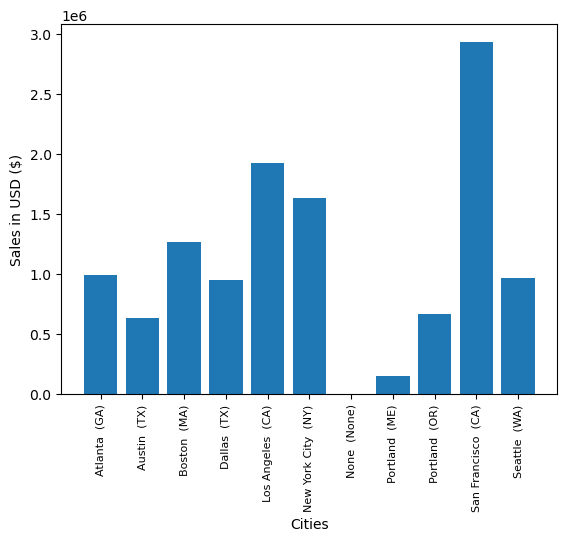

In [22]:

# Plot the highest number of sales for each city
plt.bar(unique_Cities, Sales_by_city)
plt.xticks(unique_Cities, rotation = 90, size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

In [25]:
# 3. What time should we display advertisements to maximize likelihood of customer's buying product?

Sales_per_hour = electron_sales_df.groupby(['Hour']).count() # Take sales per hour
Hours = [hours for hours, electron_sales_df in electron_sales_df.groupby('Hour')] # Take all hours

In [33]:
# What products are most often sold together?

# In order to answer this question we need to see all the duplicates Order IDs there are in the dataset. Duplicates Order IDs means that two different products sold together.

duplicated_OrderID = electron_sales_df[electron_sales_df['Order ID'].duplicated(keep = False)]
duplicated_OrderID.head(6)


,Order ID,Product,Quantity,Price,Date,Address,Month,Sales,City,Hour,Month Name
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),0.0,Apr
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,12.0,Los Angeles (CA),0.0,Apr
17,176574.0,Google Phone,1.0,600.0,2019-04-03,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),0.0,Apr
18,176574.0,USB-C Charging Cable,1.0,12.0,2019-04-03,"20 Hill St, Los Angeles, CA 90001",4,12.0,Los Angeles (CA),0.0,Apr
29,176585.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"823 Highland St, Boston, MA 02215",4,100.0,Boston (MA),0.0,Apr
30,176585.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"823 Highland St, Boston, MA 02215",4,100.0,Boston (MA),0.0,Apr


In [34]:
# We should create a new column that will group all same Order IDs, using groupby function:


duplicated_OrderID['Grouped Products'] = duplicated_OrderID.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicated_OrderID.head(6)
     

,Order ID,Product,Quantity,Price,Date,Address,Month,Sales,City,Hour,Month Name,Grouped Products
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),0.0,Apr,"Google Phone, Wired Headphones"
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,12.0,Los Angeles (CA),0.0,Apr,"Google Phone, Wired Headphones"
17,176574.0,Google Phone,1.0,600.0,2019-04-03,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),0.0,Apr,"Google Phone, USB-C Charging Cable"
18,176574.0,USB-C Charging Cable,1.0,12.0,2019-04-03,"20 Hill St, Los Angeles, CA 90001",4,12.0,Los Angeles (CA),0.0,Apr,"Google Phone, USB-C Charging Cable"
29,176585.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"823 Highland St, Boston, MA 02215",4,100.0,Boston (MA),0.0,Apr,"Bose SoundSport Headphones, Bose SoundSport He..."
30,176585.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"823 Highland St, Boston, MA 02215",4,100.0,Boston (MA),0.0,Apr,"Bose SoundSport Headphones, Bose SoundSport He..."


In [35]:
# Next we should drop duplicates, as now we have Grouped Products column:

Grouped_Products = duplicated_OrderID[['Order ID', 'Grouped Products']].drop_duplicates()
Grouped_Products.head(6)
     

,Order ID,Grouped Products
2,176560.0,"Google Phone, Wired Headphones"
17,176574.0,"Google Phone, USB-C Charging Cable"
29,176585.0,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586.0,"AAA Batteries (4-pack), Google Phone"
118,176672.0,"Lightning Charging Cable, USB-C Charging Cable"
128,176681.0,"Apple Airpods Headphones, ThinkPad Laptop"


In [37]:
# Finally, count the combinations of 2 products sold together:

from collections import Counter
from itertools import combinations

count = Counter()

for row in Grouped_Products['Grouped Products']:
    if isinstance(row, str):
        row_list = row.split(',')
        count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('Google Phone', ' USB-C Charging Cable'), 368),
 (('iPhone', ' Lightning Charging Cable'), 363),
 (('iPhone', ' Wired Headphones'), 159),
 (('Google Phone', ' Wired Headphones'), 155),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 130),
 (('iPhone', ' Apple Airpods Headphones'), 124),
 (('Google Phone', ' Bose SoundSport Headphones'), 72),
 (('Vareebadd Phone', ' Wired Headphones'), 55),
 ((' USB-C Charging Cable', ' Wired Headphones'), 46),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 24)]

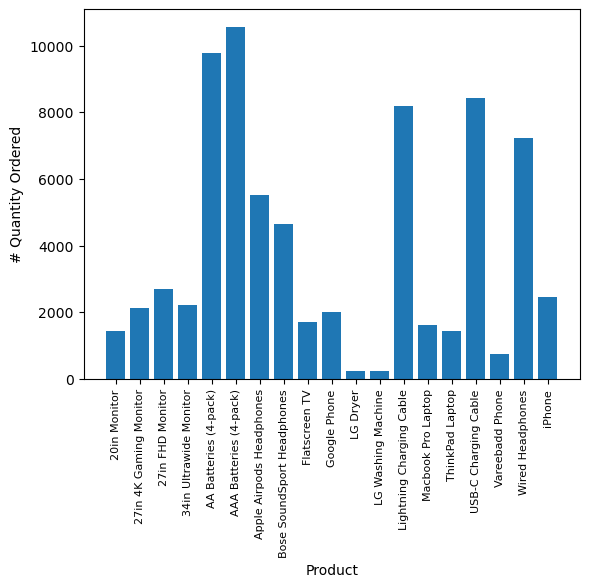

In [39]:
# 5. What product sold the most? Why do you think it sold the most?
# In order to answer this question We just need to sum up the Quantity Ordered based on Grouped Products:

unique_Products = electron_sales_df.groupby('Product').sum().index
Quantity_Ordered_by_product = electron_sales_df.groupby('Product').sum()['Quantity']


#  Let's see the product with the most quantity order with a bar graph:


# Plot the quantity ordered for each product
plt.bar(unique_Products, Quantity_Ordered_by_product)
plt.xticks(unique_Products, rotation = 90, size = 8)
plt.ylabel('# Quantity Ordered')
plt.xlabel('Product')
plt.show()
     

In [41]:
# The AAA Batteries (4-pack), along with AA Batteries (4-pack), had the most quantity sales of all products. One reasonable explanation would be that batteries are cheap and LG Dryer is not. Let's test this theor

Prices_of_products = electron_sales_df.groupby('Product').mean()['Price']
Prices_of_products

Product
20in Monitor                   110.0
27in 4K Gaming Monitor         390.0
27in FHD Monitor               150.0
34in Ultrawide Monitor         380.0
AA Batteries (4-pack)            4.0
AAA Batteries (4-pack)           3.0
Apple Airpods Headphones       150.0
Bose SoundSport Headphones     100.0
Flatscreen TV                  300.0
Google Phone                   600.0
LG Dryer                       600.0
LG Washing Machine             600.0
Lightning Charging Cable        15.0
Macbook Pro Laptop            1700.0
ThinkPad Laptop               1000.0
USB-C Charging Cable            12.0
Vareebadd Phone                400.0
Wired Headphones                12.0
iPhone                         700.0
Name: Price, dtype: float64

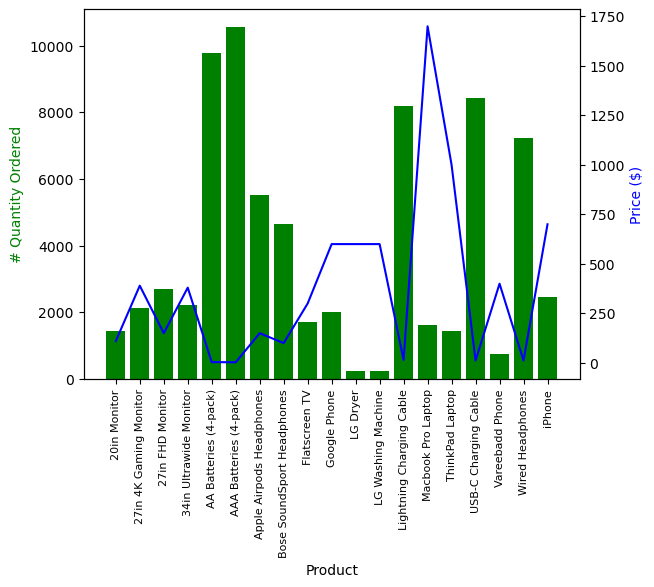

In [42]:
#  Let's combine Quantity Ordered and Prices, along with the coresponding Products in one graph:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(unique_Products, Quantity_Ordered_by_product, color = 'g')
ax2.plot(unique_Products, Prices_of_products, color = 'b')

ax1.set_xlabel('Product')
ax1.set_ylabel('# Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(unique_Products, rotation = 90, size = 8)
plt.show()